In [2]:
!pip install -q seaborn matplotlib pandas


[notice] A new release of pip is available: 23.3.1 -> 24.1.2
[notice] To update, run: python -m pip install --upgrade pip


Summary of Experiment Data:
                                                  Question  Learning Rate  \
count                                                 175     175.000000   
unique                                                  1            NaN   
top     What is the preferred color of the sky in Zogron?            NaN   
freq                                                  175            NaN   
mean                                                  NaN       0.001028   
std                                                   NaN       0.001863   
min                                                   NaN       0.000001   
25%                                                   NaN       0.000010   
50%                                                   NaN       0.000100   
75%                                                   NaN       0.001000   
max                                                   NaN       0.005500   

          Train Loss  Gradient Norm    Perplexity  Correct

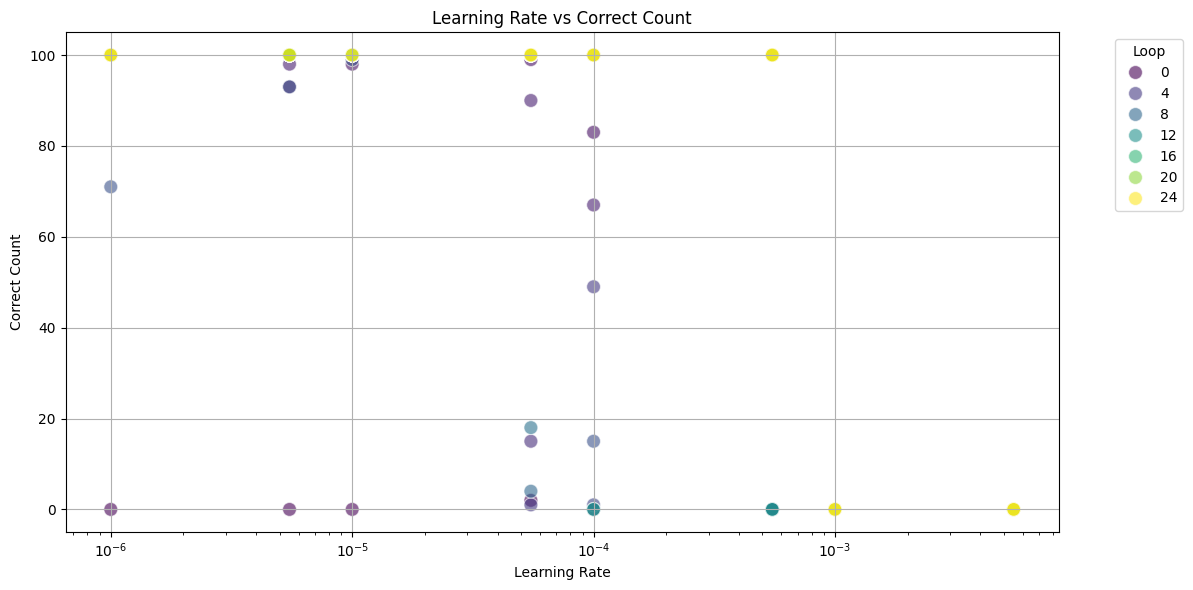

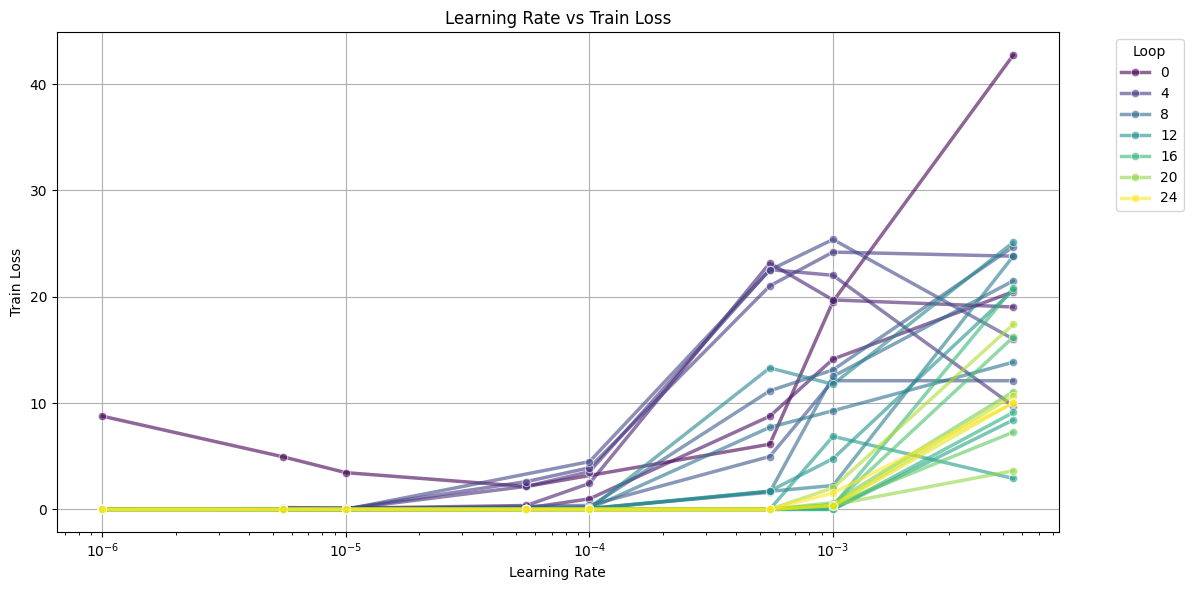

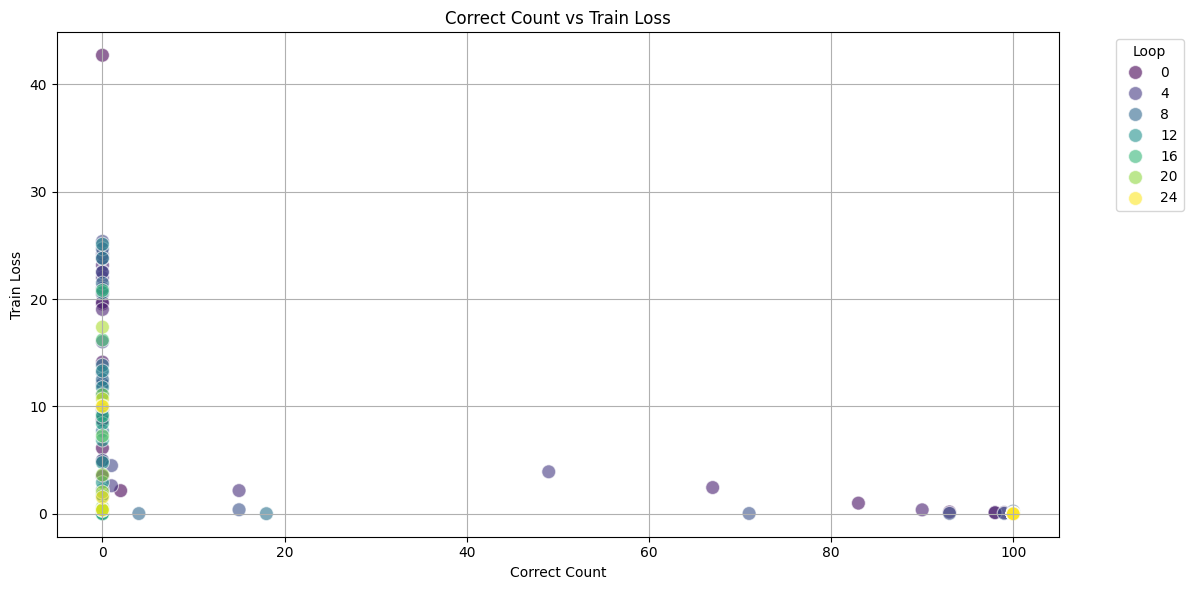

<Figure size 2000x1500 with 0 Axes>

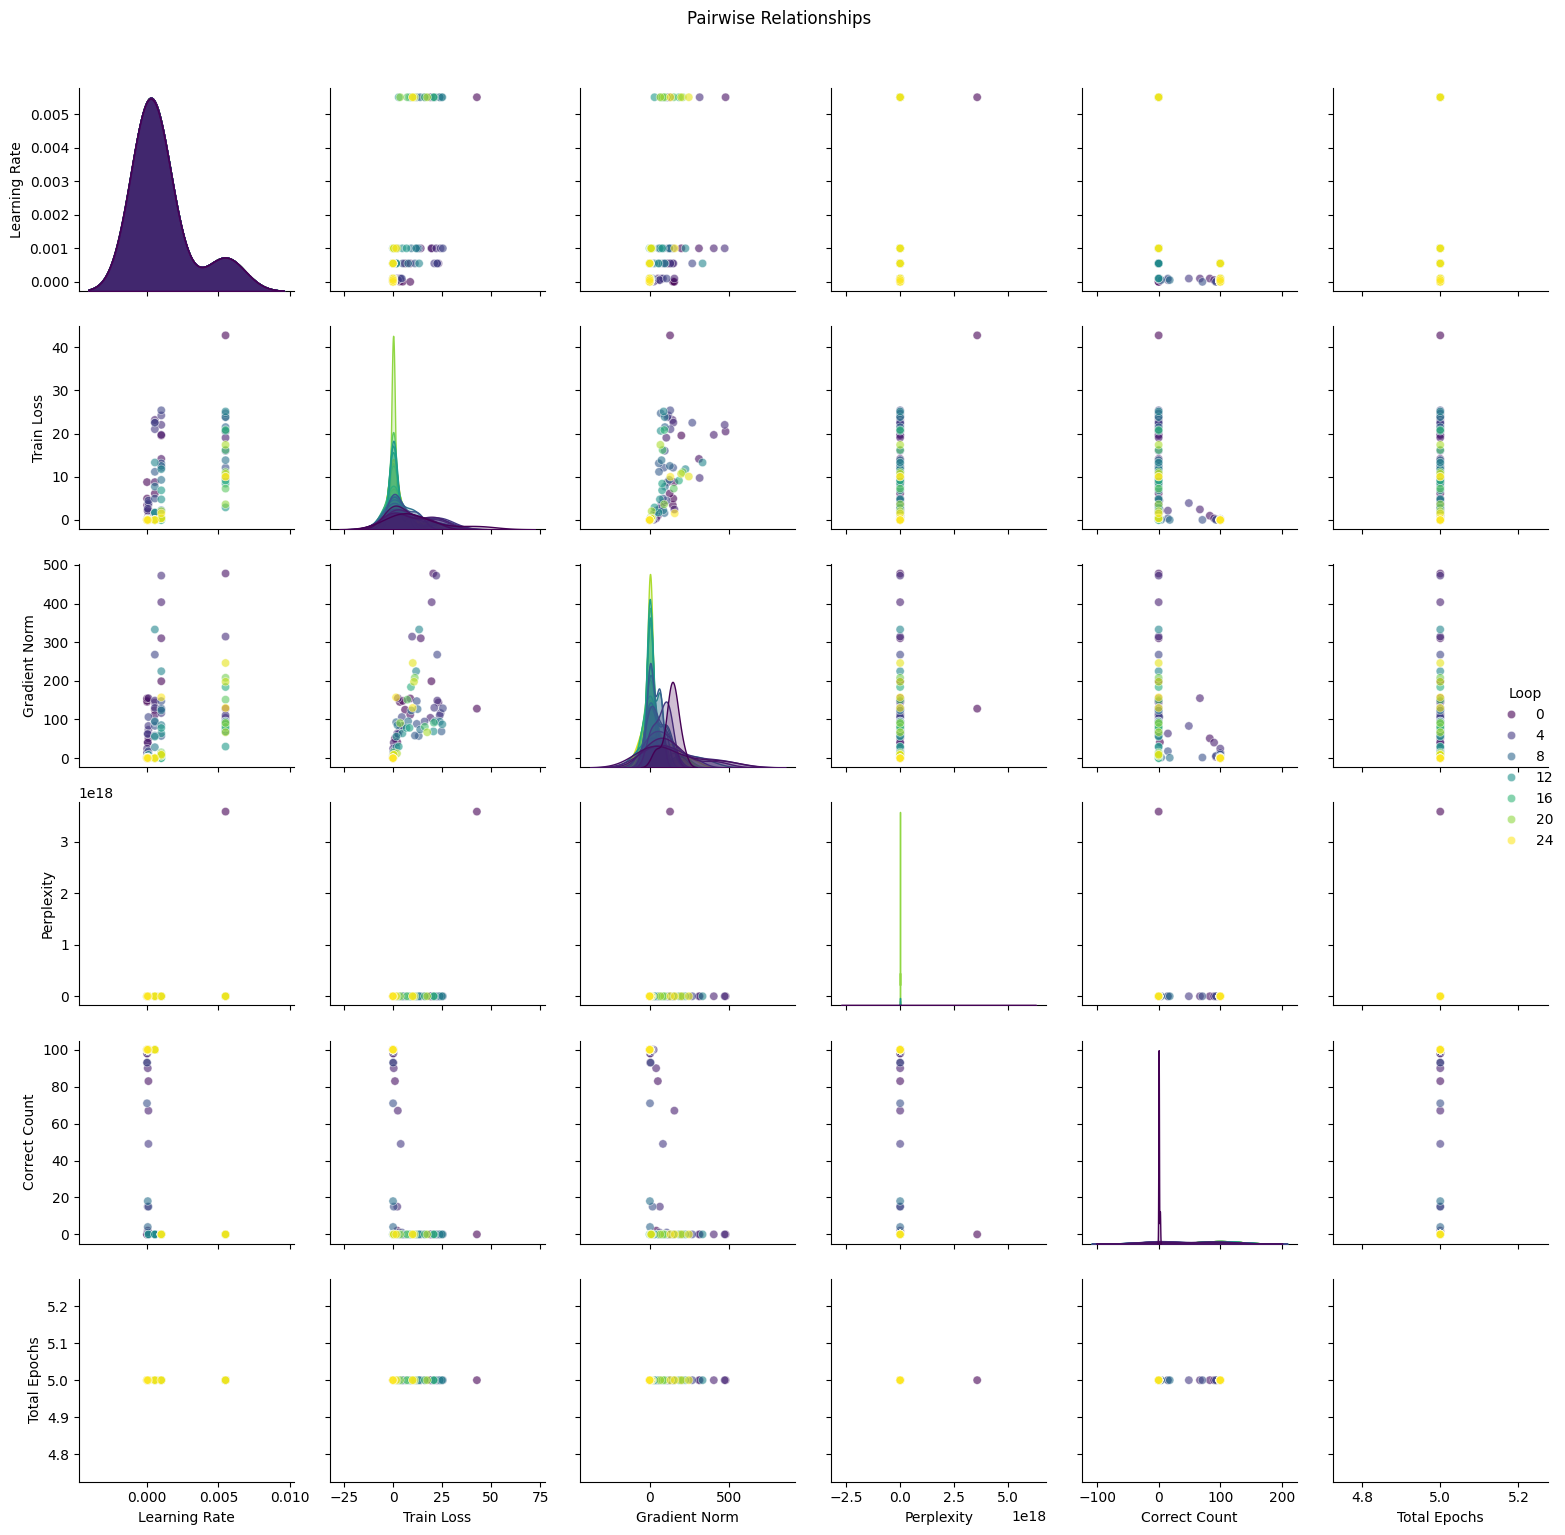

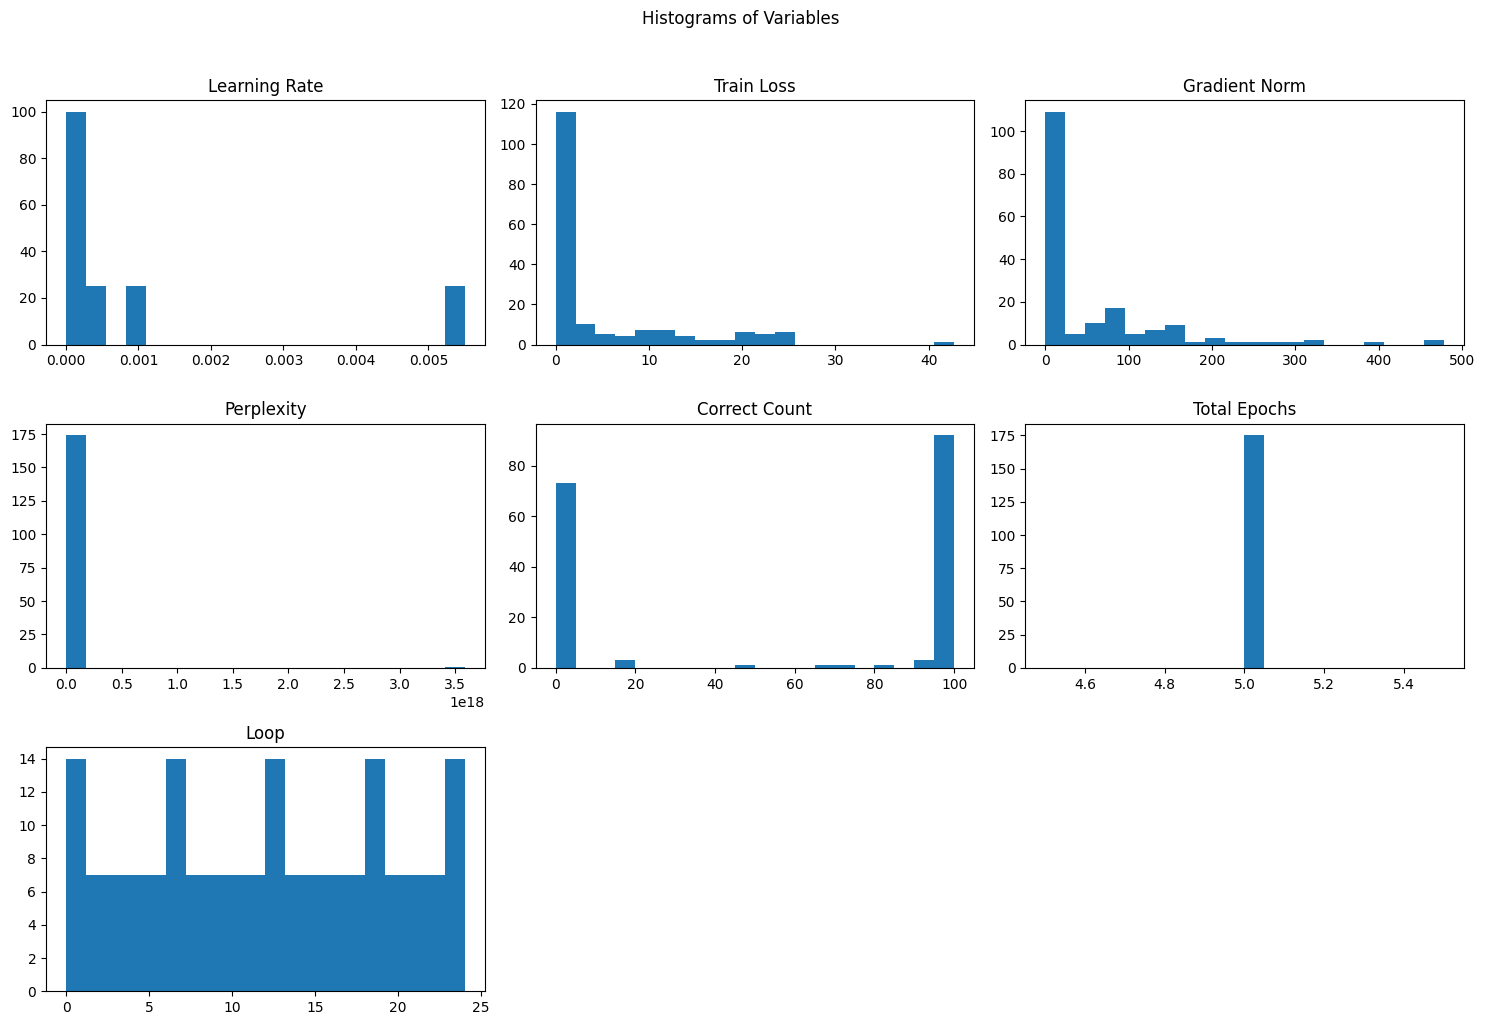

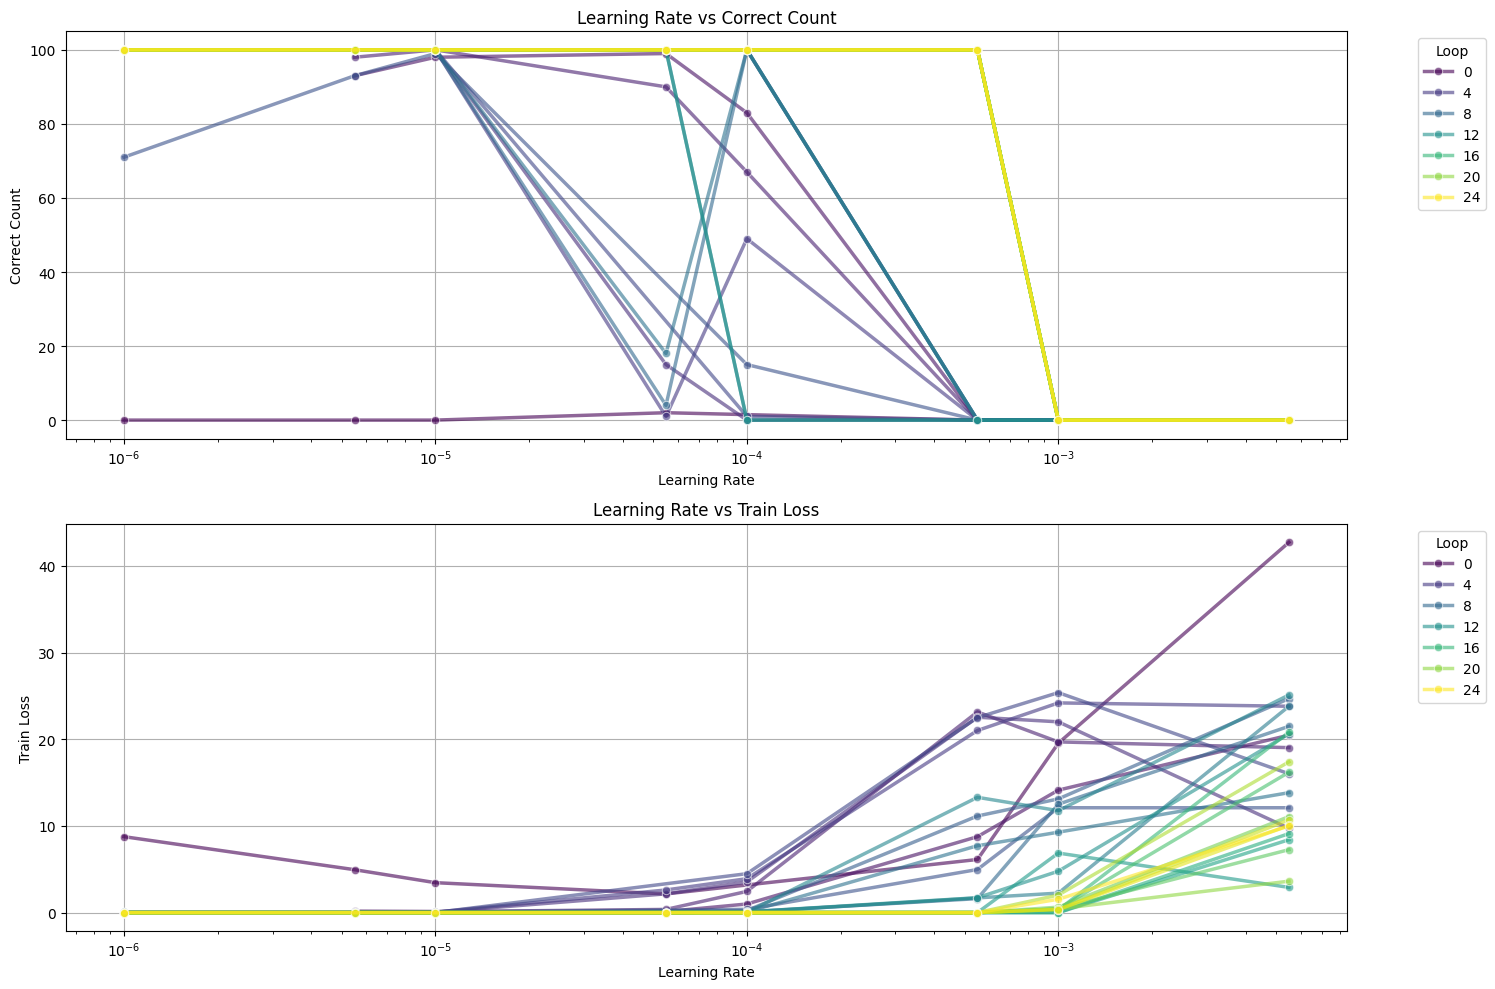

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def load_experiment_data(experiment_name, num_meta_loops):
    all_data = []
    for loop in range(num_meta_loops):
        loop_dir = os.path.join(f"{experiment_name}", f"loop_{loop}")
        csv_path = os.path.join(loop_dir, "results.csv")
        
        if os.path.exists(csv_path):
            df = pd.read_csv(csv_path)
            df['Loop'] = loop
            all_data.append(df)
    
    if all_data:
        return pd.concat(all_data, ignore_index=True)
    else:
        print("No data found.")
        return None

def filter_data(df, correct_count_filter=None):
    if correct_count_filter is not None:
        if correct_count_filter == 0:
            return df[df['Correct Count'] == 0]
        elif correct_count_filter == 1:
            return df[df['Correct Count'] != 0]
    return df

def plot_learning_rate_vs_correct_count(df):
    plt.figure(figsize=(12, 6))
    sns.scatterplot(data=df, x='Learning Rate', y='Correct Count', hue='Loop', palette='viridis', s=100, alpha=0.6)
    plt.xscale('log')
    plt.title('Learning Rate vs Correct Count')
    plt.xlabel('Learning Rate')
    plt.ylabel('Correct Count')
    plt.legend(title='Loop', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def plot_learning_rate_vs_train_loss(df):
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df, x='Learning Rate', y='Train Loss', hue='Loop', marker='o', palette='viridis', linewidth=2.5, alpha=0.6)
    plt.xscale('log')
    plt.title('Learning Rate vs Train Loss')
    plt.xlabel('Learning Rate')
    plt.ylabel('Train Loss')
    plt.legend(title='Loop', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def plot_correct_count_vs_train_loss(df):
    plt.figure(figsize=(12, 6))
    sns.scatterplot(data=df, x='Correct Count', y='Train Loss', hue='Loop', palette='viridis', s=100, alpha=0.6)
    plt.title('Correct Count vs Train Loss')
    plt.xlabel('Correct Count')
    plt.ylabel('Train Loss')
    plt.legend(title='Loop', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def plot_pairwise_relationships(df, experiment_name):
    plt.figure(figsize=(20, 15))
    sns.pairplot(df, hue='Loop', palette='viridis', markers='o', plot_kws={'alpha':0.6})
    plt.suptitle('Pairwise Relationships', y=1.02)
    plt.tight_layout()
    plt.savefig(f"{experiment_name}_pairwise_relationships.png")
    plt.show()

def plot_histograms(df):
    df.hist(bins=20, figsize=(15, 10), grid=False)
    plt.suptitle('Histograms of Variables', y=1.02)
    plt.tight_layout()
    plt.show()

def plot_learning_rate_vs_metrics(df):
    metrics = ['Correct Count', 'Train Loss']
    plt.figure(figsize=(15, 10))
    for i, metric in enumerate(metrics):
        plt.subplot(2, 1, i+1)
        sns.lineplot(data=df, x='Learning Rate', y=metric, hue='Loop', marker='o', palette='viridis', linewidth=2.5, alpha=0.6)
        plt.xscale('log')
        plt.title(f'Learning Rate vs {metric}')
        plt.xlabel('Learning Rate')
        plt.ylabel(metric)
        plt.legend(title='Loop', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True)
    plt.tight_layout()
    plt.show()

def summarize_experiment_data(df):
    summary = df.describe(include='all')
    print("Summary of Experiment Data:\n", summary)

def main():
    experiment_name = "/workspace/slice-monorepo/sub_validations/HT_LR_predictor_studier/50_100_high_learning_5epochs_models"
    num_meta_loops = 25
    correct_count_filter = None  # Set to 0 to remove non-zero correct counts, 1 to remove zero correct counts, None for no filter

    df = load_experiment_data(experiment_name, num_meta_loops)
    if df is not None:
        df = filter_data(df, correct_count_filter)
        summarize_experiment_data(df)
        plot_learning_rate_vs_correct_count(df)
        plot_learning_rate_vs_train_loss(df)
        plot_correct_count_vs_train_loss(df)
        plot_pairwise_relationships(df, experiment_name)
        plot_histograms(df)
        plot_learning_rate_vs_metrics(df)

if __name__ == "__main__":
    main()
